# Composition Generator

In [121]:
from utilities.std_imports import *
import matplotlib
from datetime import datetime
matplotlib.rcParams['figure.figsize'] = (26,8)
from statsmodels.tsa.seasonal import seasonal_decompose

### Level

$\large y(t) = k $

In [83]:
def gen_level(level, n):
    return np.full(n, level)

### Trend

$\large y(t) = at + b $

In [84]:
def gen_trend(a, b, n):
    t = np.linspace(start=0, stop=1, num=n)
    return a*t + b

### Seasonality

$\large y = \rho \cos(\omega t-\theta) = \rho \cos(\theta) \cos(\omega t) + \rho \sin(\theta) \sin(\omega t) = \alpha \cos(\omega t) + \beta \sin(\omega t)$

 $T$ : is the number of time periods required to complete a single cycle of the wave  
 $\omega = 1/T$ : the fraction of the complete cycle that’s completed in a single time period   
 $A$ : amplitude  
 $\phi$ : phase  
   
 $ \large y(t) =  A \cos(2 \pi \; \omega t + \phi) $ 

In [85]:
def get_seas(A, T, phi, n):
    t = np.linspace(start=0, stop=n, num=n)
    w = 1/T
    return A * np.cos(2* np.pi * w*t + phi)

### Noise

$\large y \sim \mathcal{N}(\mu,\,\sigma^{2}) $

In [86]:
def gen_wnoise(m, s, n):
    t = np.arange(n)
    return s * np.random.randn(n) + m

### Components

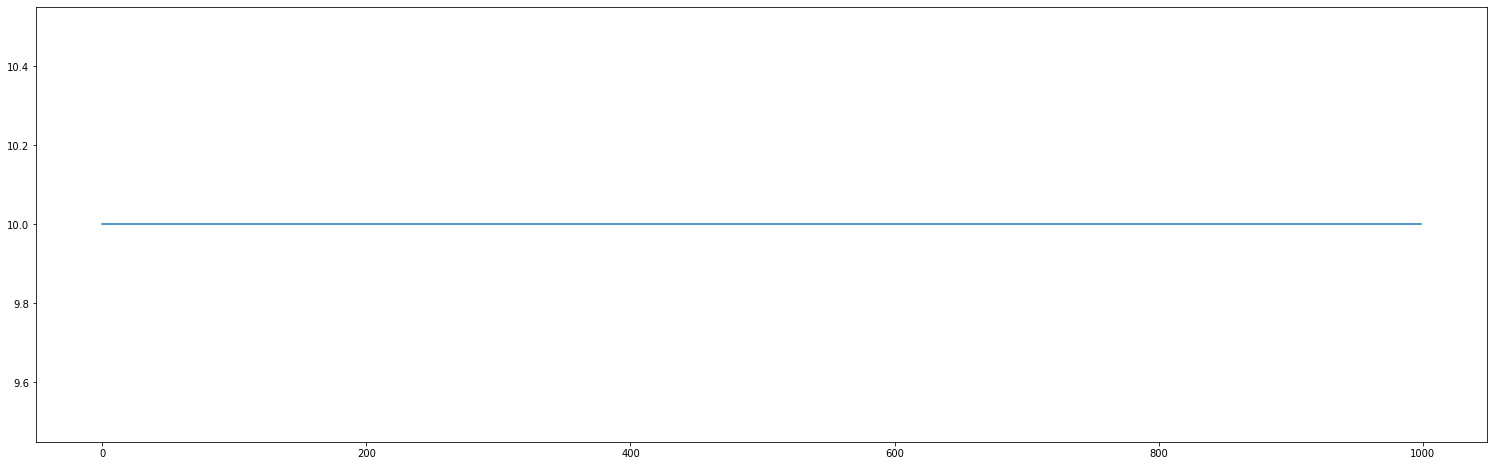

In [87]:
ts_lev = gen_level(level=10, n=1000)
plt.plot(ts_lev);

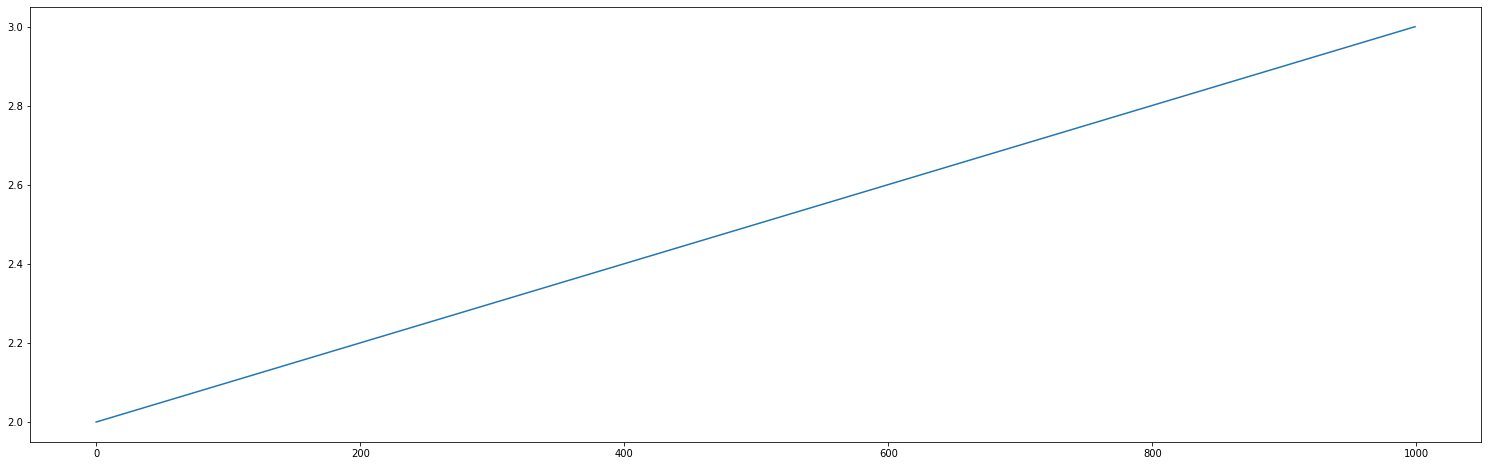

In [88]:
ts_tre = gen_trend(a=1, b=2, n=1000)
plt.plot(ts_tre);

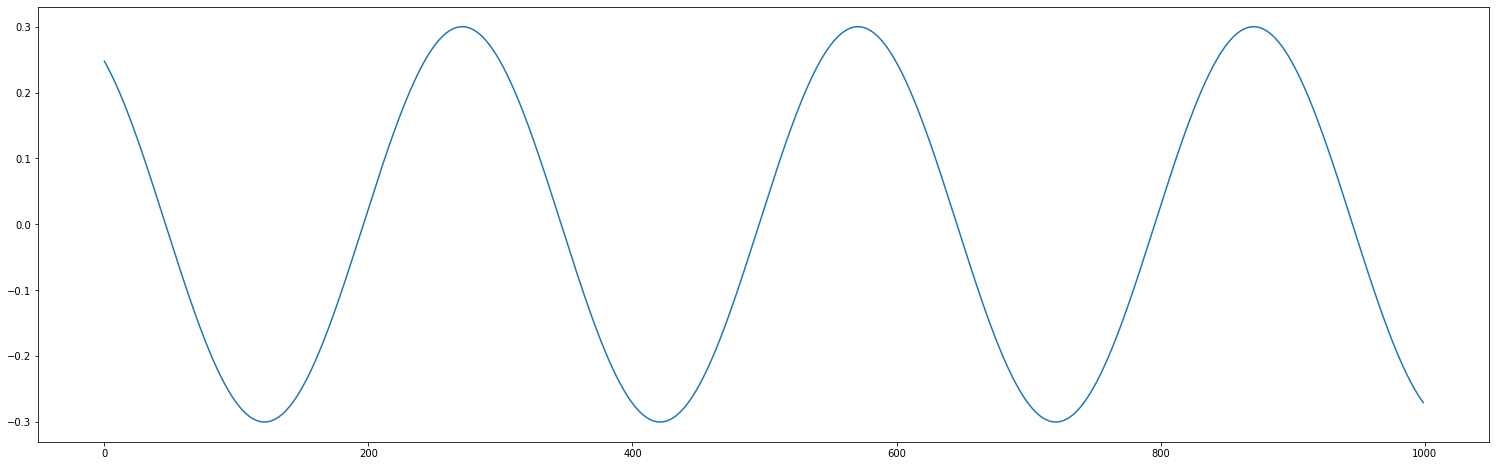

In [103]:
ts_seas1 = get_seas(A=0.3, T=300, phi=0.6, n=1000)
plt.plot(ts_seas1);

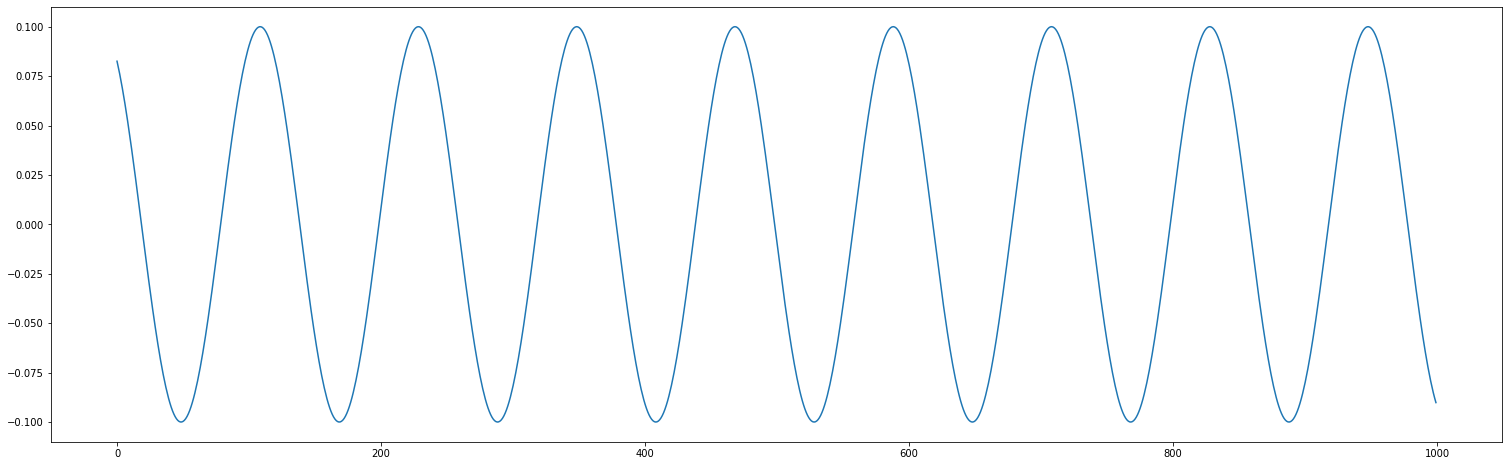

In [106]:
ts_seas2 = get_seas(A=0.1, T=120, phi=0.6, n=1000)
plt.plot(ts_seas2);

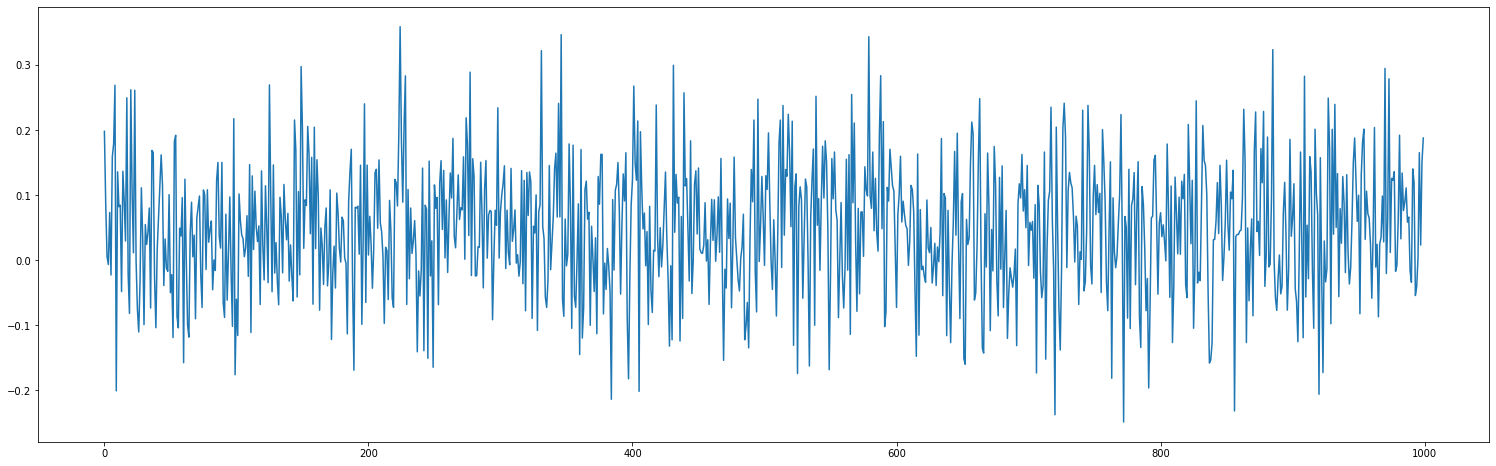

In [96]:
ts_noi = gen_wnoise(m=0.05, s=0.1, n=1000)
plt.plot(ts_noi);

### Composition

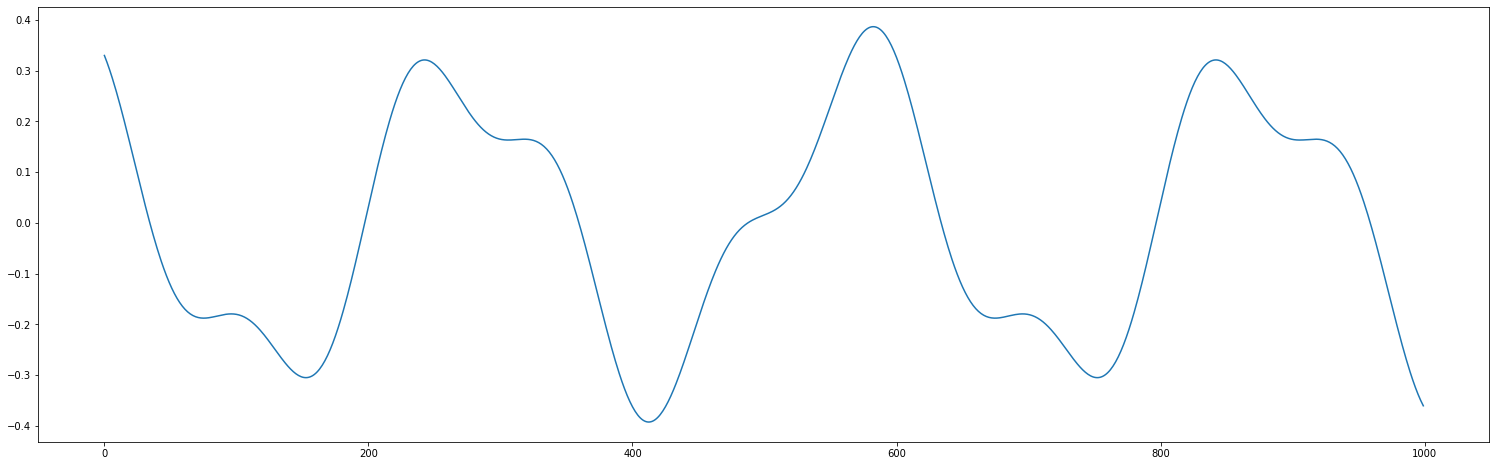

In [107]:
ts_seas = ts_seas1 + ts_seas2
plt.plot(ts_seas);

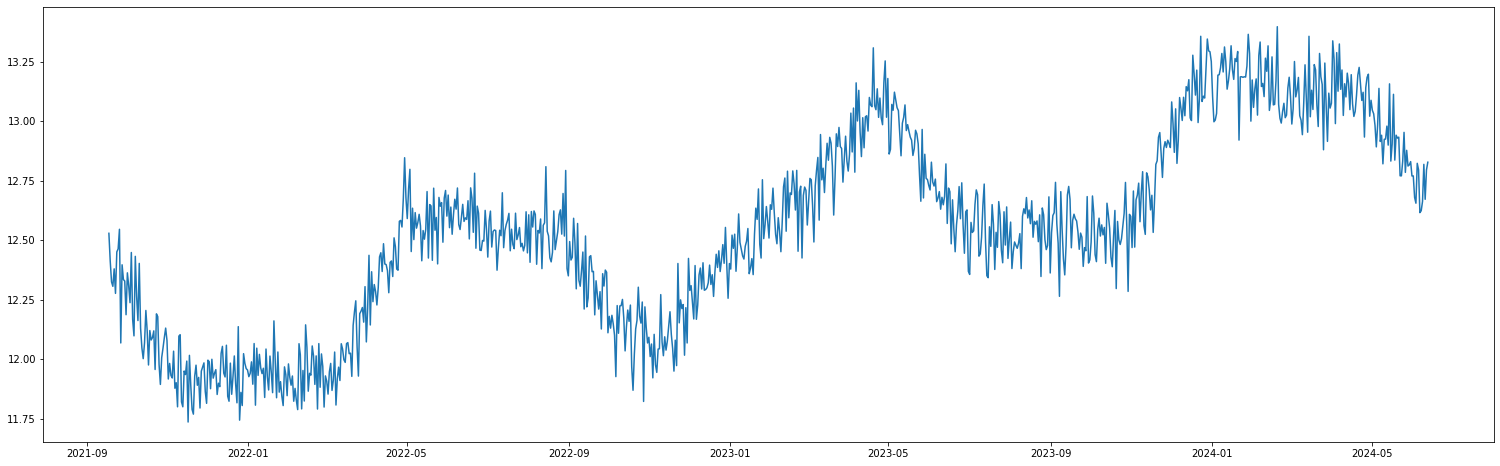

In [129]:
ts = ts_lev + ts_tre + ts_seas1 + ts_seas2 + ts_noi
dates = pd.date_range(datetime.today(), periods=1000).tolist()
df = pd.DataFrame(ts, index = dates)
plt.plot(df);

In [131]:
df.to_csv(ts_path + 'synth1.csv')
df.head()

,0
2021-09-17 13:10:06.304884,12.528515
2021-09-18 13:10:06.304884,12.412006
2021-09-19 13:10:06.304884,12.324218
2021-09-20 13:10:06.304884,12.305678
2021-09-21 13:10:06.304884,12.379144


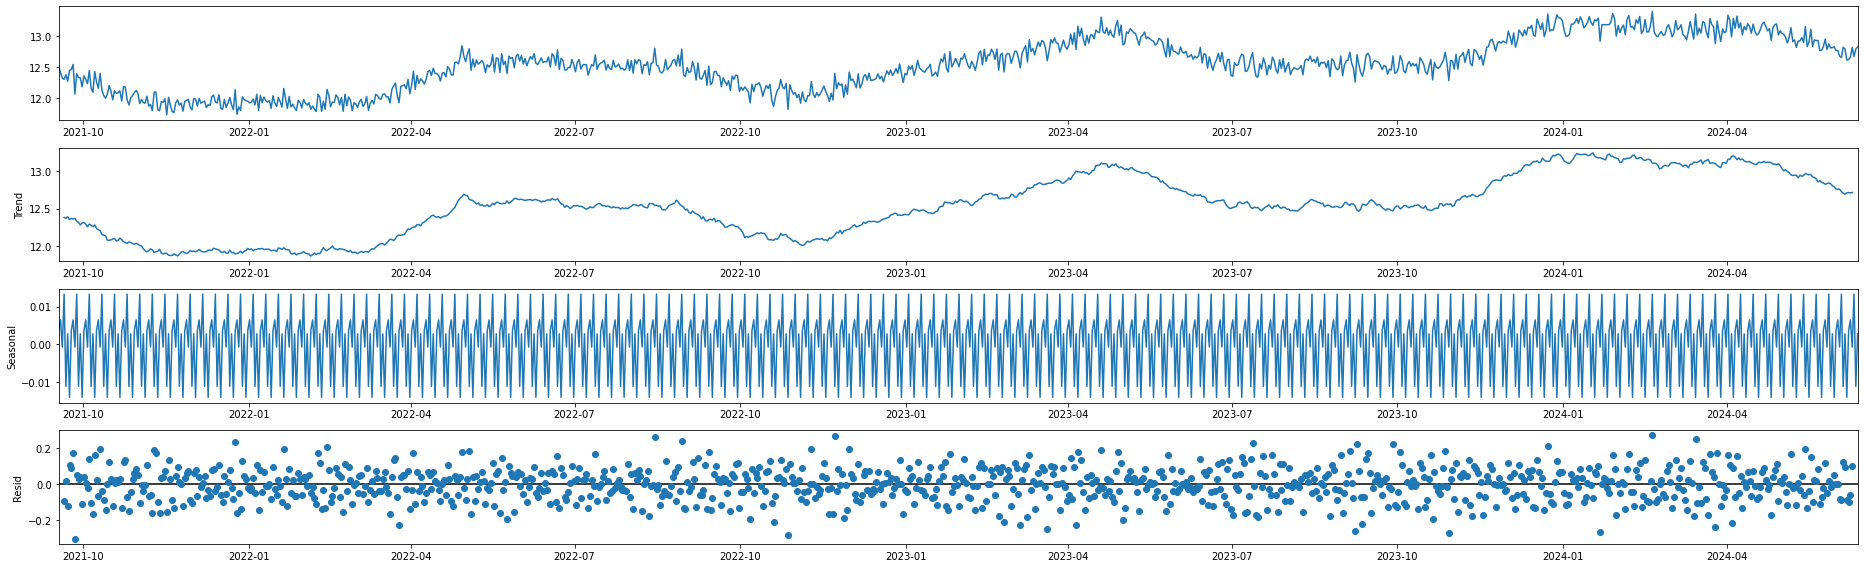

In [127]:
res = seasonal_decompose(ts, model='additive')
res.plot();

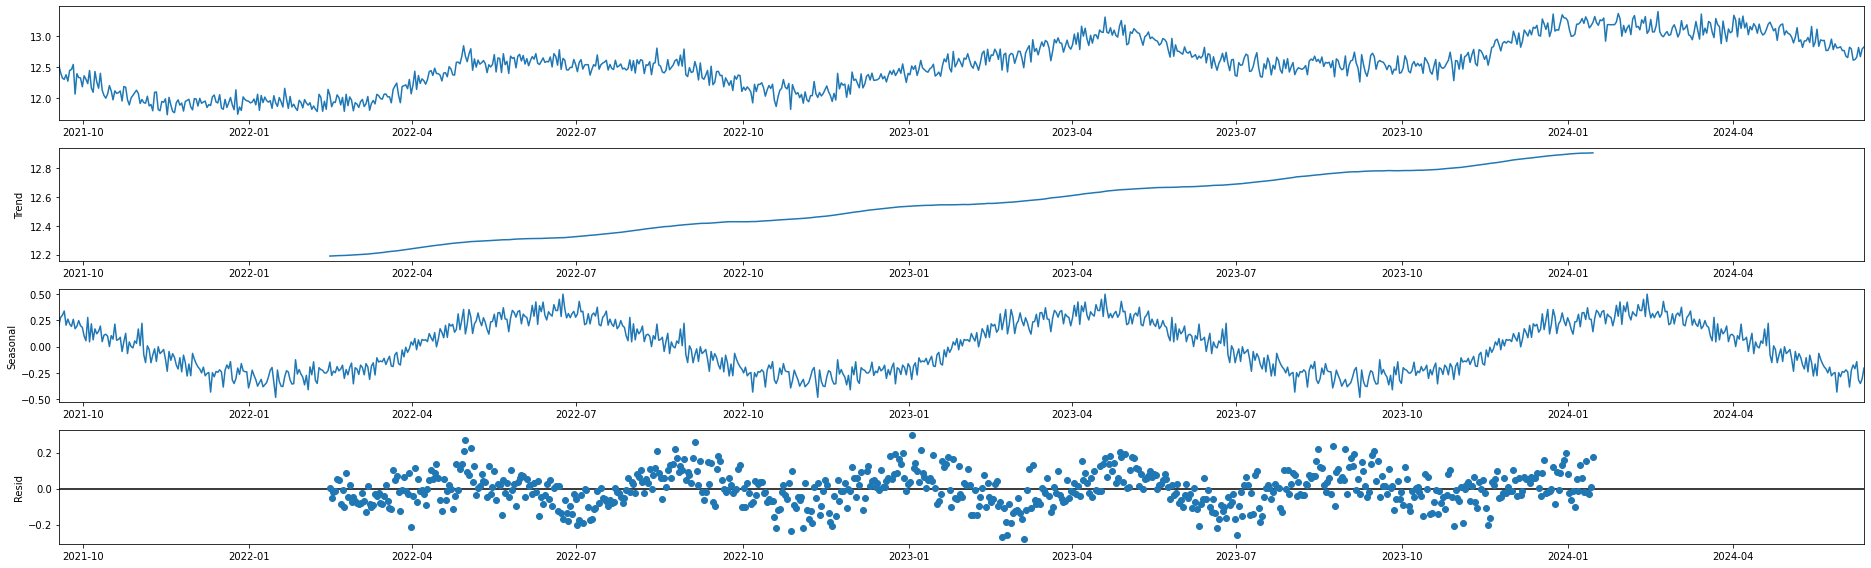

In [128]:
res = seasonal_decompose(ts, model='additive', period=300)
res.plot();